* 도미와 빙어의 길이, 무게 데이터를 각각 합친 리스트를 사용한다.
    * 도미 [:35], 빙어 [35:]
* **scikit learn package 이용해서 training set와 test set 분리한다.**
* 수상한 물고기 한 마리 [25, 150]이 도미인지, 빙어인지 예측한다.
    * **kneighbors() method 이용해서 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다.**
    * **kneighbors() method를 통해 주어진 샘플에서 가장 가까운 이웃을 찾을 수 있다.**
    * **x축과 y축의 범위를 동일하게 표현한다: ```plt.xlim()``` ```plt.ylim()```**
    * **z-점수 표준화 (z-score standardization)**
        * 두 특성의 스케일을 맞춰주기 위해 사용
        * X_scaled = (X - mean) / std
        * 변수 X의 범위를 평균으로부터 몇 std(표준편차)까지 떨어져있는지 확인, 변수의 스케일을 확대/축소 시키는 방식
* 전처리 데이터로 모델 훈련하기

## Data Preprocessing

### Data on Fish (Bream and Smelt)

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

##### numpy 함수 사용해서 데이터와 타겟 배열 객체 반환하기
- ```np.함수명```
- ```np.zeros()```: 0으로 초기화된 shape 차원의 ndarray 배열 객체 반환
- ```np.ones()```: 1로 초기화
- ```np.empty()```: 초기화하지 않은
- ```np.full()```: 모든 값을 10으로 초기화

* shape은 행열의 차원을 나타내고, ndarray는 배열 객체를 반환, array는 리스트 객체에 사용

```np.column_stack(([a, b]))```
-  두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

In [5]:
# n.n
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
fish_data = np.column_stack((fish_length, fish_weight)) # np.column_stack 사용해서 column이 두 개인 2차원 배열 만들기
print(len(fish_data)) # columns = length, weight
print(fish_data)


49
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


```np.concatenate((a, b, axis = 0))```: 두 배열을 왼쪽에서 오른쪽으로 붙이기 <br>
```np.concatenate((a, b, axis = 1))```: 두 배열을 위에서 아래로 붙이기 <br>
-  default(axis = 0)

In [14]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # np.concatenate 사용해서 target 배열 만들어주기
            # np.ones 사용해서 도미 = 1 로 설정, np.zeros 사용해서 빙어 = 0으로 초기화
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### scikit-learn 이용해서 training set & test set 분리하기

In [16]:
from sklearn.model_selection import train_test_split
    # 훈련 세트와 테스트 세트 분리하기 위해 sklearn에서 train_test_split 호출
    
train_data, test_data, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)
    # 훈련 세트와 테스트 세트 분리.

print(train_data.shape, test_data.shape)
print(train_target.shape, test_target.shape)
    # 훈련 세트와 테스트 세트의 행열의 차원(shape) 확인

(36, 2) (13, 2)
(36,) (13,)


In [17]:
print(test_target) # random sampling 되었는지 확인

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
train_data, test_data, train_target, test_target = train_test_split(fish_data, fish_target, 
                                                                    stratify = fish_target, random_state = 42)
                                                    # target(y) 기준으로 startify! 데이터 분리 비율 맞추기

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 수상한 물고기!

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 분류 모델을 객체에 정의
kn.fit(train_data, train_target) # 훈련 세트로 분류 모델 학습
kn.score(test_data, test_target) # 훈련 잘 되었는지 테스트 세트로 정확도 확인

1.0

In [22]:
# 수상한 물고기의 길이는 25, 무게는 150

print(kn.predict([[25, 150]])) # output = [0.] 빙어라고 예측. 근데 이 물고기 사실은 도미임 ㅠ

    # KNeighborsClassifier()는 비슷한 특성을 가진 데이터는 비슷한 범주에 속한다는 가정의 분류법.
    # 가장 가까운 이웃 데이터를 이용해서 예측
    # 빙어의 데이터가 가장 가까웠나? - Data visualization으로 확인해보면 된다.

[0.]


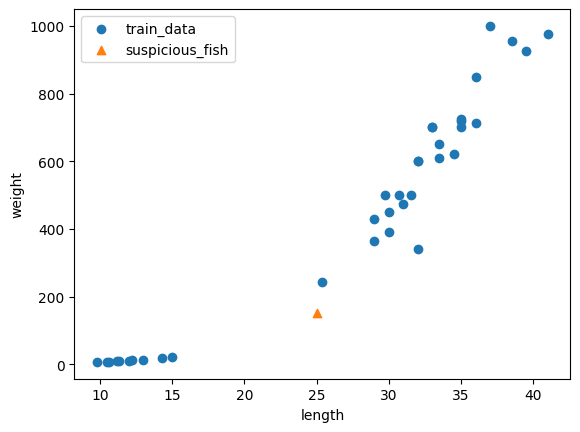

In [30]:
import matplotlib.pyplot as plt

plt.scatter(train_data[:, 0], train_data[:, 1], label = 'train_data')
# plt.scatter(test_data[:, 0], test_data[:, 1], label = 'test_data')
    # 없어도 됨
    # 훈련 세트로 분류 모델 학습 시켰고, 개별적인 테스트 셋 [25, 150]에 대해서 예측하기 위함이니까
    # 이전에 사용한 테스트 세트는 필요 없당.
plt.scatter(25, 150, marker = '^', label = 'suspicious_fish')
plt.legend(loc = 0)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 보기에는 수상한 물고기는 빙어데이터에 가까워보이지 않는당.. 
- 더 정확히 보기 위해 가장 가까운 이웃과의 거리와 그 이웃샘플의 인덱스를 얻어서 그래프에 표시해보자.
    - ```모델.kneighbors()``` 함수를 사용해 distances와 indexes를 반환한다.
    - 가장 가까운 이웃과의 거리와 그 이웃샘플의 인덱스를 얻을 수 있다.
    - n_neighbor의 default = 5 이기 때문에 5개의 인덱스와 거리가 반환될 것이다.

In [28]:
distances, indexes = kn.kneighbors([[25, 150]])
print('distances: ', distances)
print('indexes: ', indexes)

distances:  [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
indexes:  [[21 33 19 30  1]]


* 반환된 5개의 이웃샘플의 데이터도 그래프에 표현해보자.

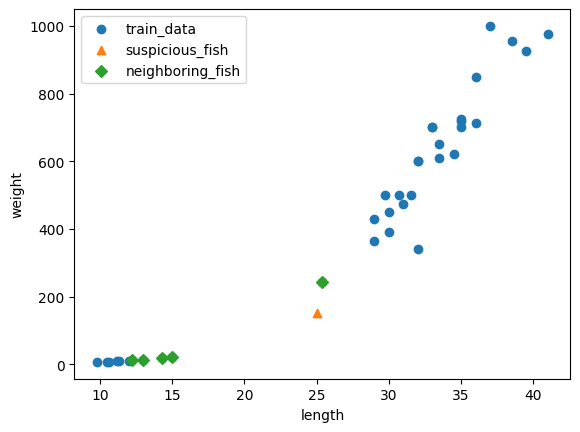

In [31]:
plt.scatter(train_data[:, 0], train_data[:, 1], label = 'train_data')
            # x = 모든 행의 0번째 column(length)에 해당하는 값
            # y =모든 행의 1번째 column(weight)에 해당하는 값
plt.scatter(25, 150, marker = '^', label = 'suspicious_fish')
plt.scatter(train_data[indexes, 0], train_data[indexes, 1], marker = 'D', label = 'neighboring_fish')
            # x = 해당 index의 'length' column에 해당하는 값
            # y = 해당 index의 'weight' column에 해당하는 값
plt.legend(loc = 0)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
train_data[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [33]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

In [34]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

- 누가봐도 도미랑 가까운 물고기인데 빙어라고 나온 이유는 가장 가까운 데이터의 물고기 5개 중 4개가 빙어로 나왔기 때문이다.
- x축과 y축의 범위가 다르면 이런 오류가 생길 수 있다.
- **데이터 전처리가 중요한 이유!**
- x축과 y축의 범위를 맞춰주자.


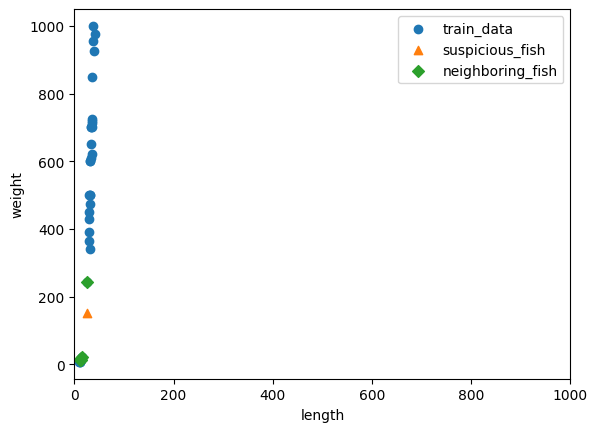

In [35]:
plt.scatter(train_data[:, 0], train_data[:, 1], label = 'train_data')
            # x = 모든 행의 0번째 column(length)에 해당하는 값
            # y =모든 행의 1번째 column(weight)에 해당하는 값
plt.scatter(25, 150, marker = '^', label = 'suspicious_fish')
plt.scatter(train_data[indexes, 0], train_data[indexes, 1], marker = 'D', label = 'neighboring_fish')
            # x = 해당 index의 'length' column에 해당하는 값
            # y = 해당 index의 'weight' column에 해당하는 값
plt.legend(loc = 0)

plt.xlabel('length')
plt.ylabel('weight')

plt.xlim((0, 1000)) # y 축의 범위와 동일하게 설정
plt.show()

- 두 축의 범위를 맞춰주었을 때 x축의 거리 차이가 의미없다는 것을 알 수 있다.
- 두 특성의 스케일이 다르면 스케일을 일정한 기준으로 맞추어 주어야 한다.
- K-NN 알고리즘처럼 거리 기반 알고리즘을 사용할 때에는 데이터 표현 기준이 다르면 올바른 예측이 불가능하다.

### Broadcasting
##### z-점수 표준화 (z-score standardization)
- ```X_scaled = (X - mean) / std```
- 변수 X의 범위를 평균으로부터 몇 표준편차만큼 떨어져 있는지에 따라 변수의 스케일을 확대/축소시키는 방식

In [37]:
mean = np.mean(train_data, axis = 0) # 열의 평균을 구한다
std = np.std(train_data, axis = 0) # 열의 표준편차를 구한다
# axis = 0 행을 따라 열의 통계 값을 계산하겠다
# axis = 1 열을 따라 행의 통계 값을 계산하겠다

In [38]:
train_scaled = (train_data - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [41]:
suspicious_scaled = ([25, 150] - mean) / std
suspicious_scaled

array([-0.23012627, -0.94060693])

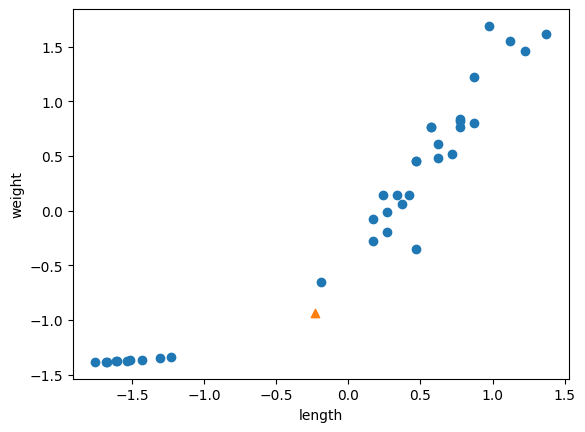

In [43]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(suspicious_scaled[0], suspicious_scaled[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 스케일링 완료
- 스케일링한 학습 데이터로 분류 모델 학습시킨다.

In [44]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [45]:
test_scaled = (test_data - mean) / std

In [46]:
kn.score(test_scaled, test_target)

1.0

In [49]:
kn.predict([suspicious_scaled]) # 스케일링한 수상한 물고기 데이터

# output [1.] = 도미
# 정답이다!

array([1.])

In [52]:
distances, indexes = kn.kneighbors([suspicious_scaled])
print('distances: ', distances)
print('indexes: ', indexes)

distances:  [[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
indexes:  [[21 14 34 32  5]]


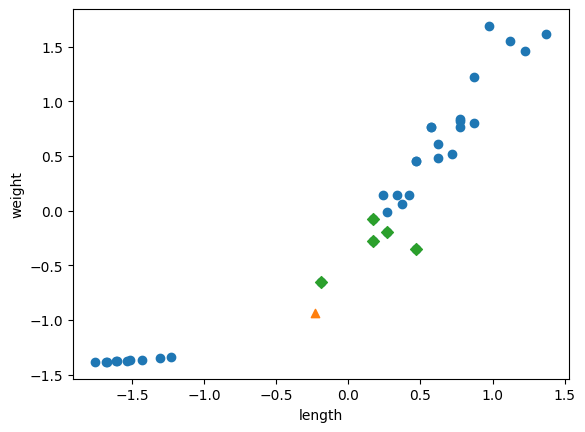

In [53]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(suspicious_scaled[0], suspicious_scaled[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()